# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БПИ2303 Курочкин Никита

***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Кратчайшее расстояние от A до E: 6


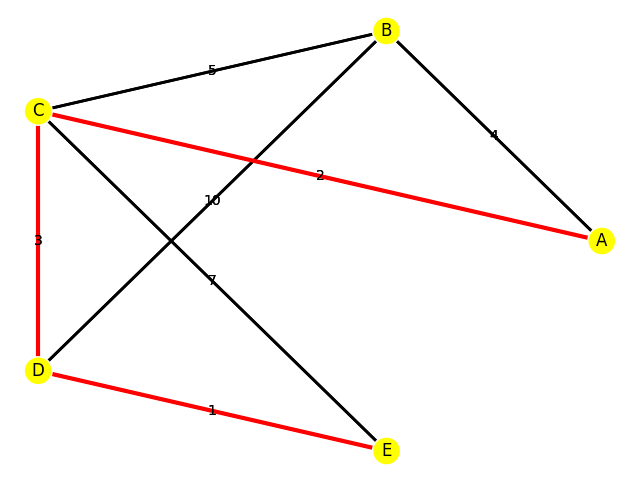

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def bellman_ford(graph, start):
    dist = {vertex: float('inf') for vertex in graph}
    dist[start] = 0
    prev = {vertex: None for vertex in graph}  

    for _ in range(len(graph) - 1):
        for u in graph:
            for v, weight in graph[u].items():
                if dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight
                    prev[v] = u

    return dist, prev 

#Алгоритм Флойда-Уоршелла

def floyd_warshall(graph):
    nodes = list(graph.keys())
    dist = {node: {node2: float('inf') for node2 in nodes} for node in nodes}

    for node in nodes:
        dist[node][node] = 0

    for node in graph:
        for neighbor, weight in graph[node].items():
            dist[node][neighbor] = weight

    for k in nodes:
        for i in nodes:
            for j in nodes:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

# Пример использования:
graph = {
    'A': {'B': 3, 'C': 8, 'E': -4},
    'B': {'D': 1, 'E': 7},
    'C': {'B': 4},
    'D': {'A': 2, 'C': -5},
    'E': {'D': 6}
}

distances = floyd_warshall(graph)
print(distances)

#Алгоритм Дейкстры
import heapq

def dijkstra(graph, start):
    dist = {vertex: float('inf') for vertex in graph}
    dist[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > dist[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return dist

# Пример использования:
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'C': 2, 'D': 5},
    'C': {'D': 1},
    'D': {}
}

distances = dijkstra(graph, 'A')
print(distances)

#Алгоритм Джонсона
import heapq

def johnson(graph):
    new_node = 'Q'
    graph[new_node] = {node: 0 for node in graph}
    
    def bellman_ford(graph, start):
        dist = {node: float('inf') for node in graph}
        dist[start] = 0

        for _ in range(len(graph) - 1):
            for node in graph:
                for neighbor, weight in graph[node].items():
                    if dist[node] + weight < dist[neighbor]:
                        dist[neighbor] = dist[node] + weight

        return dist

    h = bellman_ford(graph, new_node)
    graph.pop(new_node)

    for u in graph:
        for v in graph[u]:
            graph[u][v] += h[u] - h[v]

    distances = {}
    for u in graph:
        distances[u] = dijkstra(graph, u)
        for v in distances[u]:
            distances[u][v] += h[v] - h[u]

    return distances

# Пример использования:
graph = {
    'A': {'B': 3, 'C': 8, 'E': -4},
    'B': {'D': 1, 'E': 7},
    'C': {'B': 4},
    'D': {'A': 2, 'C': -5},
    'E': {'D': 6}
}

distances = johnson(graph)
print(distances)

#Алгоритм Левита
from collections import deque

def levit(graph, start):
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    m0 = deque([start])
    m1 = set()
    m2 = set(graph.keys()) - {start}

    while m0:
        u = m0.popleft()
        for v, weight in graph[u].items():
            if v in m2:
                dist[v] = dist[u] + weight
                m0.append(v)
                m2.remove(v)
            elif v in m1 and dist[v] > dist[u] + weight:
                dist[v] = dist[u] + weight
                m0.appendleft(v)
                m1.remove(v)

    return dist

# Пример использования:
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'C': 2, 'D': 5},
    'C': {'D': 1},
    'D': {}
}

distances = levit(graph, 'A')
print(distances)

#Алгоритм Йена
import heapq

def yen(graph, start, end, k):
    def dijkstra(graph, start, end):
        dist = {vertex: float('inf') for vertex in graph}
        dist[start] = 0
        priority_queue = [(0, start, [])]

        while priority_queue:
            (cost, node, path) = heapq.heappop(priority_queue)
            if node == end:
                return cost, path + [end]
            for neighbor, weight in graph[node].items():
                if dist[neighbor] > cost + weight:
                    dist[neighbor] = cost + weight
                    heapq.heappush(priority_queue, (cost + weight, neighbor, path + [node]))

        return float('inf'), []

    paths = []
    dist, path = dijkstra(graph, start, end)
    if path:
        paths.append((dist, path))

    for _ in range(k - 1):
        for i in range(len(path) - 1):
            temp_graph = {node: dict(neighbors) for node, neighbors in graph.items()}
            temp_graph[path[i]].pop(path[i + 1])
            dist, new_path = dijkstra(temp_graph, start, end)
            if new_path:
                paths.append((dist, new_path))

    paths.sort()
    return paths[:k]

# Пример использования:
graph = {
    'A': {'B': 1, 'C': 2},
    'B': {'D': 1},
    'C': {'D': 1},
    'D': {}
}

k_shortest_paths = yen(graph, 'A', 'D', 3)
print(k_shortest_paths)



def generate_positions(graph):
    n = len(graph)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    positions = {node: (np.cos(angle), np.sin(angle)) for node, angle in zip(graph.keys(), angles)}
    return positions

def plot_graph(graph, shortest_paths, prev, start, end):
    positions = generate_positions(graph)

    fig, ax = plt.subplots(figsize=(8, 6))

    # Рисуем вершины
    for vertex, (x, y) in positions.items():
        ax.plot(x, y, 'bo', markersize=10)
        ax.text(x, y, vertex, fontsize=12, ha='center', va='center', color='black', bbox=dict(facecolor='yellow', edgecolor='white', boxstyle='circle'))

    # Рисуем рёбра
    for u in graph:
        for v, weight in graph[u].items():
            x1, y1 = positions[u]
            x2, y2 = positions[v]
            ax.plot([x1, x2], [y1, y2], 'k-', lw=2)
            ax.text((x1 + x2) / 2, (y1 + y2) / 2, f'{weight}', fontsize=10, ha='center', va='center')

    # Отрисовка кратчайшего пути
    if start and end and shortest_paths and prev[end] is not None:
        path = [end]
        while path[-1] != start:
            path.append(prev[path[-1]])  
        path.reverse()  

        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            x1, y1 = positions[u]
            x2, y2 = positions[v]
            ax.plot([x1, x2], [y1, y2], 'ro-', lw=3)

    plt.axis('off')  
    plt.show()  

# Пример графа (его можно заменить на любой другой)
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 7},
    'D': {'B': 10, 'C': 3, 'E': 1},
    'E': {'C': 7, 'D': 1}
}

# Входные параметры
start_vertex = 'A'
end_vertex = 'E'
shortest_paths, prev = bellman_ford(graph, start_vertex)

# Вывод результата и визуализация
if end_vertex in shortest_paths:
    result = shortest_paths[end_vertex]
    print(f"Кратчайшее расстояние от {start_vertex} до {end_vertex}: {result}")
    plot_graph(graph, shortest_paths, prev, start_vertex, end_vertex)
else:
    print(f"Нет пути от {start_vertex} до {end_vertex}")

### Вывод